# Importing important Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [18]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications import MobileNetV2  # further i will be training this dataset on some predefined architectures
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
Training_data = '/content/drive/MyDrive/FruitCLass_DS/Train_Sample' # This is a sample of the whole Training dataset i am using
Test_data = '/content/drive/MyDrive/FruitCLass_DS/Test_Sample' # This is a sample of the whole test dataset i am using

In [21]:
img_shape=(224,224) # target image sixe
batch_size = 32 # batch size for training
Seed = 8  # random seed for reproducibility
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                 validation_split=0.3)
test_datagen =ImageDataGenerator(preprocessing_function= preprocess_input)

In [22]:
train_generator = train_datagen.flow_from_directory(Training_data,
                                                    target_size=img_shape,
                                                    color_mode='rgb',
                                                    seed=Seed,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True)
val_generator   = train_datagen.flow_from_directory(Training_data,
                                                    target_size=img_shape,
                                                    color_mode='rgb',
                                                    seed=Seed,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='validation',
                                                    shuffle=True)
test_generator = test_datagen.flow_from_directory(Test_data,
                                                  target_size=img_shape,
                                                  color_mode='rgb',
                                                  seed=Seed,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 345 images belonging to 2 classes.
Found 146 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


In [24]:
num_classes  = len(list(train_generator.class_indices.keys())) # number of classes in the Dataset

In [25]:
#define the model
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_shape[0],img_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 20)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 40)      7240      
                                                                 
 dense_4 (Dense)             (None, 109, 109, 100)     4100      
                                                                 
 flatten_1 (Flatten)         (None, 1188100)           0         
                                                                 
 dense_5 (Dense)             (None, 100)               118810100 
                                                      

In [27]:
#defining the callbacks
callbacks = [ModelCheckpoint('model_chkpt/weights.{epoch:02d}_{val_loss:.4f}_{val_accuracy:.4f}.h5')] # this callback has been imported from a best prctise code from stackoverflow .cited in

In [28]:
results= model.fit(train_generator,
                    validation_data=val_generator,
                   callbacks= callbacks,
                    epochs=20,
                    )

Epoch 1/20
11/11 [==============================] - 6s 494ms/step - loss: 6.6910 - accuracy: 0.7623 - val_loss: 22.6263 - val_accuracy: 0.6507
Epoch 2/20
11/11 [==============================] - 9s 898ms/step - loss: 0.8578 - accuracy: 0.8899 - val_loss: 8.4533 - val_accuracy: 0.6027
Epoch 3/20
11/11 [==============================] - 6s 528ms/step - loss: 0.2669 - accuracy: 0.9507 - val_loss: 5.3513 - val_accuracy: 0.6027
Epoch 4/20
11/11 [==============================] - 5s 476ms/step - loss: 0.1969 - accuracy: 0.9420 - val_loss: 8.6435 - val_accuracy: 0.6164
Epoch 5/20
11/11 [==============================] - 5s 489ms/step - loss: 0.1092 - accuracy: 0.9710 - val_loss: 5.8720 - val_accuracy: 0.5890
Epoch 6/20
11/11 [==============================] - 5s 486ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 6.1143 - val_accuracy: 0.5890
Epoch 7/20
11/11 [==============================] - 5s 511ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 6.4257 - val_accuracy: 0.5822
Epoch

# Accuracy and Loss curves
##These 2 plots represent the Accuracy and Loss curves per epoch and the lables are representing whether it is on test data or validation data

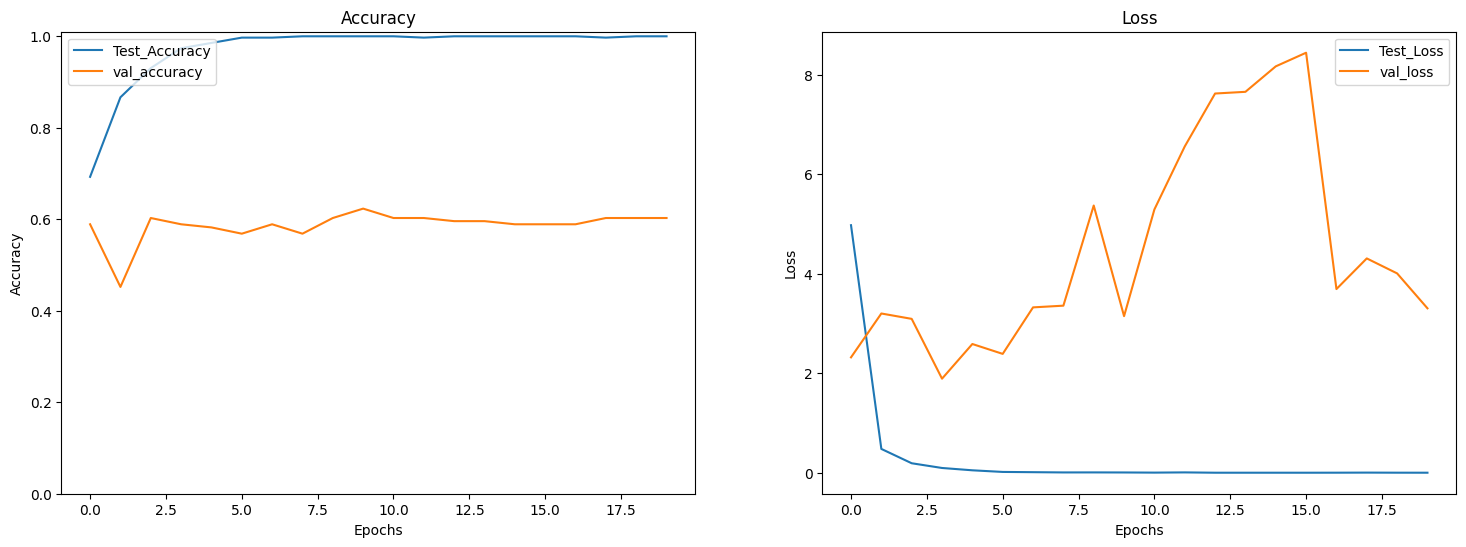

In [16]:
result_df = pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result_df[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[0].set_ylim(0,1.01)
ax[0].set_ylabel("Accuracy") # yaxis for left side plot
ax[0].set_xlabel("Epochs")# xaxis for left side plot
ax[0].legend(['Test_Accuracy', 'val_accuracy'], loc='upper left')
ax[1].plot(result_df[['loss','val_loss']])
ax[1].set_title("Loss")
ax[1].set_ylabel("Loss")# yaxis for right side plot
ax[1].set_xlabel("Epochs")# xaxis for right side plot
ax[1].legend(['Test_Loss', 'val_loss'], loc='upper right')